In [168]:
import pickle

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import csv

import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

In [169]:
with open('train_label.pkl','rb') as f:
    train_label=pickle.load(f)
    
#number of unique classes
print("Number of unique classes in the dataset:", np.unique(train_label))

#number of instances to check if the dataset is well-balanced or not
print("Number of instances of each class:", Counter(train_label))

Number of unique classes in the dataset: [0 2 3 6]
Number of instances of each class: Counter({0: 2000, 2: 2000, 3: 2000, 6: 2000})


Since the dataset is well-balanced, we can use Accuracy (as opposed to the F1-score) as the performance metric to score the models we build. 

In [170]:
with open('train_image.pkl','rb') as f:
    train_image=pickle.load(f)

In [171]:
train_image=np.array(train_image)

print("Shape of Train image:",train_image.shape,"length of train labels:", len(train_label))

Shape of Train image: (8000, 784) length of train labels: 8000


In [172]:
train_image=train_image.reshape(8000,28,28)

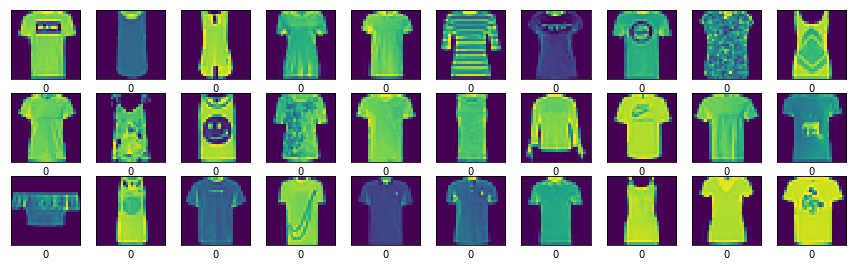

In [173]:
#print the top 10 
plt.figure(figsize=(15,15))
for i in range(30):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])   
    plt.imshow(train_image[i])
    plt.xlabel(train_label[i])
plt.show()


In [189]:
with open('test_image.pkl','rb') as f:
    test_image=pickle.load(f)
test_image=np.array(train_image)
test_image=test_image.reshape(8000,28,28)
test_image.shape

(8000, 28, 28)

In [175]:
#Normalizing train and test images

train_image = train_image / 255.0
test_image = test_image/ 255.0

In [176]:
#shuffle contents of train
train_image, train_label = shuffle(train_image, train_label)

#spilt train set into train and validation set
train_split_data = train_image[0:int(0.8*(train_image.shape[0]))]
train_split_label = train_label[0:int(0.8*(train_image.shape[0]))]
val_split_data = train_image[int(0.8*(train_image.shape[0])):]
val_split_label = train_label[int(0.8*(train_image.shape[0])):]

print(train_split_data, train_split_label)


[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.      

In [177]:
nsamples, nx, ny = train_split_data.shape
train_split_data = train_split_data.reshape((nsamples,nx*ny))

nsamples, nx, ny = val_split_data.shape
val_split_data = val_split_data.reshape((nsamples,nx*ny))

In [178]:
y_true = val_split_label

#Trying out different classifiers and find the best one to perform a grid seach over

###############---------Logistic Regression------#########
lr_clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
lr_clf.fit(train_split_data, train_split_label)
y_pred = lr_clf.predict(val_split_data)
print("Accuracy scores from a Logistic Regresssion:", accuracy_score(y_true, y_pred))

###############---------Decision Tree Classifier------#########
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(train_split_data, train_split_label)
y_pred = dt_clf.predict(val_split_data)
print("Accuracy scores from a Decision Tree Classifier is:", accuracy_score(y_true, y_pred))

###############---------K nearest neighbor Classifier------#########
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(train_split_data, train_split_label)
y_pred = knn_clf.predict(val_split_data)
print("Accuracy scores from a K-nearest neigbhor Classifier is:", accuracy_score(y_true, y_pred))

###############---------Naive Bayes Classifier------#########
nb_clf = GaussianNB()
nb_clf.fit(train_split_data, train_split_label)
y_pred = nb_clf.predict(val_split_data)
print("Accuracy scores from a Naive Bayes Classifier is:", accuracy_score(y_true, y_pred))

###########-----SVM----######
svm_clf = svm.SVC()
svm_clf.fit(train_split_data, train_split_label)
y_pred = svm_clf.predict(val_split_data)
print("Accuracy scores from a SVM:", accuracy_score(y_true, y_pred))


###########---RF-----######
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                            random_state=0)
rf_clf.fit(train_split_data, train_split_label)
y_pred = rf_clf.predict(val_split_data)
print("Accuracy scores from a Random Forest:", accuracy_score(y_true, y_pred))


###########---GradientBoosting Classifier-----######
grad_clf = GradientBoostingClassifier()
grad_clf.fit(train_split_data, train_split_label)
y_pred = grad_clf.predict(val_split_data)
print("Accuracy scores from a Gradient Boost Classifier:", accuracy_score(y_true, y_pred))

###########---AdaBoost Classifier-----######
ada_clf = AdaBoostClassifier()
ada_clf.fit(train_split_data, train_split_label)
y_pred = ada_clf.predict(val_split_data)
print("Accuracy scores from a Ada Boost Classifier:", accuracy_score(y_true, y_pred))


Accuracy scores from a Logistic Regresssion: 0.803125
Accuracy scores from a Decision Tree Classifier is: 0.73625
Accuracy scores from a K-nearest neigbhor Classifier is: 0.81125
Accuracy scores from a Naive Bayes Classifier is: 0.65
Accuracy scores from a SVM: 0.793125
Accuracy scores from a Random Forest: 0.753125
Accuracy scores from a Gradient Boost Classifier: 0.838125
Accuracy scores from a Ada Boost Classifier: 0.7475


Intuition behind trying out the boosting methods was the underlying knowledge that boosting techniques perform better especially when we have very simple base learners and result in low variance and low bias classifiers.

Hence the best performing model on the 80-20 split for the train set is : Gradient Boost Classifier with an accuracy score of 83.81%.  A model that performs with an accuracy of > 80% is a good model (good baseline model). We can employ more sophisticated models that capture variances in the dataset better to perform better than this, if that is the target!


In [190]:
print("Acutal distribution on Validation set:",  Counter(y_true))
print("Predicted distribution on Validation set:",  Counter(y_pred))

Acutal distribution on Validation set: Counter({2: 407, 0: 402, 3: 401, 6: 390})
Predicted distribution on Validation set: Counter({2: 471, 3: 447, 0: 384, 6: 298})


In [191]:
print("Shape of test:", test_image.shape)
nsamples, nx, ny = test_image.shape
test_image = test_image.reshape((nsamples,nx*ny))

predictions=grad_clf.predict(test_image)

Shape of test: (8000, 28, 28)


In [192]:
import pandas as pd

In [193]:
test_index=list(range(0,8000))

df = pd.DataFrame(columns=['Test_image_index','predicted_class'])
df['Test_image_index'] = test_index
df['predicted_class'] = predictions

print("Predicted distribution:",  Counter(predictions))

print(df)

Predicted distribution: Counter({2: 2043, 0: 2038, 3: 2030, 6: 1889})
      Test_image_index  predicted_class
0                    0                3
1                    1                2
2                    2                0
3                    3                6
4                    4                0
5                    5                6
6                    6                6
7                    7                6
8                    8                3
9                    9                2
10                  10                0
11                  11                3
12                  12                6
13                  13                2
14                  14                6
15                  15                3
16                  16                6
17                  17                6
18                  18                0
19                  19                3
20                  20                3
21                  21                0
22        

In a (most) Machine Learning problem/s, the assumption is that the train and the test set are drawn from the same distribution. 
In the case of our predictions we see that the distribution over the labels predicted is similar to true distibutions in out train set. This trend is also seen in the predictions and the true lables that belong to the vlaidation set (we can also look at this as if looking at confusion matrices). 

Hence, I submit the solution I have found here. There are obviously incremental approaches we can look at over this baseline model that I submit here. For example, there is no feature extraction I do here, which is a potential avenue for exploration - what are good features for this dataset? better representations?. 

Also, there a lots of different modeling approaches to try out as well. I have tried out some classical ML classifier, there are ways to obtain better results from these classifiers itself by performing Cross-Validation and Grid-Search experiments to find the best model that can be used during test time.

I have abstained from using a deep learning model here, since the amount of data we are trying to learn from is not a lot. But, there is definitely scope to try out some vanilla and sophisticated models that can learn better from the given dataset.

In [194]:
import csv
df.to_csv('Shruthi_Hiremath.csv',index=False)